# LOAN PREDICTION

Binary classification using Logistic Regression

In [1]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore'),

C:\Users\Sneha Sharma\AppData\Local\Temp\ipykernel_15224\4083261588.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(None,)

Importing and Loading Dataset

In [2]:
# from google.colab import files
# uploaded = files.upload()


ModuleNotFoundError: No module named 'google'

In [3]:
df=pd.read_csv('train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Dataset Shape

In [5]:
df.shape

(614, 13)

Checking the Missing Values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

First we will fill the missing values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [7]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [8]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

Lets confirm if there are any missing values in 'LoanAmount & 'Credit_History'

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now lets drop all the missing values remaining

In [10]:
df.dropna(inplace=True)

Lets check missing values for the final time

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus themissing values are dropped.

Now, lets check the final Dataset Shape

In [12]:
df.shape

(542, 13)

# Exploratory Data Analysis

Comparison between Parameters in getting the Loan:

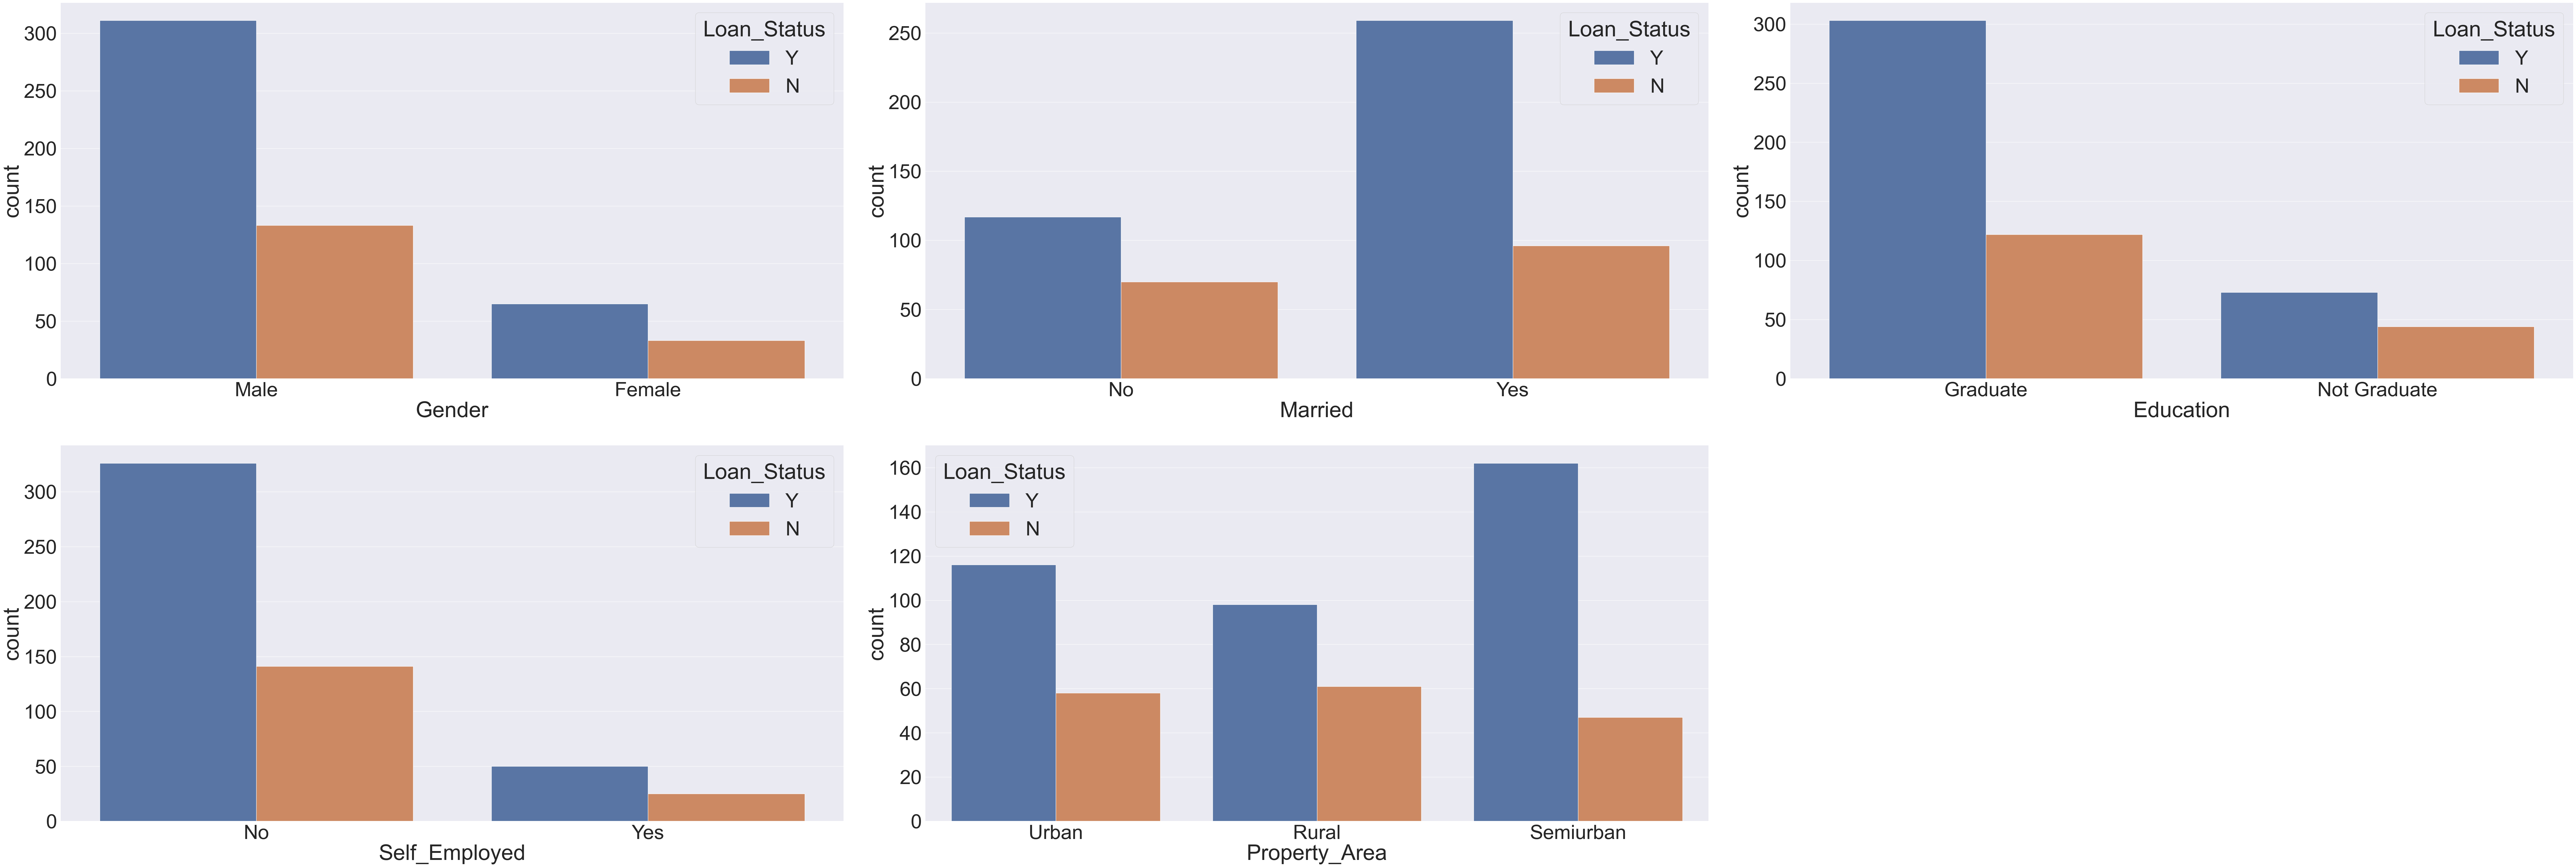

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(100, 50))
sns.set(font_scale=5)

plt.subplot(331)
sns.countplot(data=df, x='Gender', hue='Loan_Status')

plt.subplot(332)
sns.countplot(data=df, x='Married', hue='Loan_Status')

plt.subplot(333)
sns.countplot(data=df, x='Education', hue='Loan_Status')

plt.subplot(334)
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')

plt.subplot(335)
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')

plt.tight_layout()
plt.show()

# Lets replace the Variable values to Numerical form & display the Value Counts

The data in Numerical form avoids disturbances in building the model.

In [14]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [15]:
df['Loan_Status'].value_counts()

Loan_Status
1    376
0    166
Name: count, dtype: int64

In [16]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

Gender
1    444
0     98
Name: count, dtype: int64

In [17]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

Married
1    355
0    187
Name: count, dtype: int64

In [18]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

Dependents
0    309
1     94
2     94
3     45
Name: count, dtype: int64

In [19]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

Education
1    425
0    117
Name: count, dtype: int64

In [20]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

Self_Employed
0    467
1     75
Name: count, dtype: int64

In [21]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

Property_Area
1    209
2    174
0    159
Name: count, dtype: int64

In [22]:
df['LoanAmount'].value_counts()

LoanAmount
146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: count, Length: 195, dtype: int64

In [23]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [24]:
df['Credit_History'].value_counts()

Credit_History
1.0    468
0.0     74
Name: count, dtype: int64

From the above figure, we can see that Credit_History (independent variable) has the maximum correlation with Loan_Status (dependent variable) which denotes that the Loan_Status is heavily dependant on the Credit_History.

# Final DataFrame

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


# Importing Packages for Classification algorithms

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Splitting the Data into Train and Test set

In [27]:
x=df.iloc[1:542,1:12].values
y=df.iloc[1:542,12].values

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

# Logistic Regression (LR)

Logistic Regression is a supervised learning classification algorithm used to predict the probability of a target variable.

Mathematically, a logistic regression model predicts P(y=1) as a function of x. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, Cancer detection etc.

Sigmoid Function

In [29]:
model=LogisticRegression()
model.fit(x_train,y_train)

lr_prediction=model.predict(x_test)
print('Logistic Regression accuracy= ',metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy=  0.7914110429447853


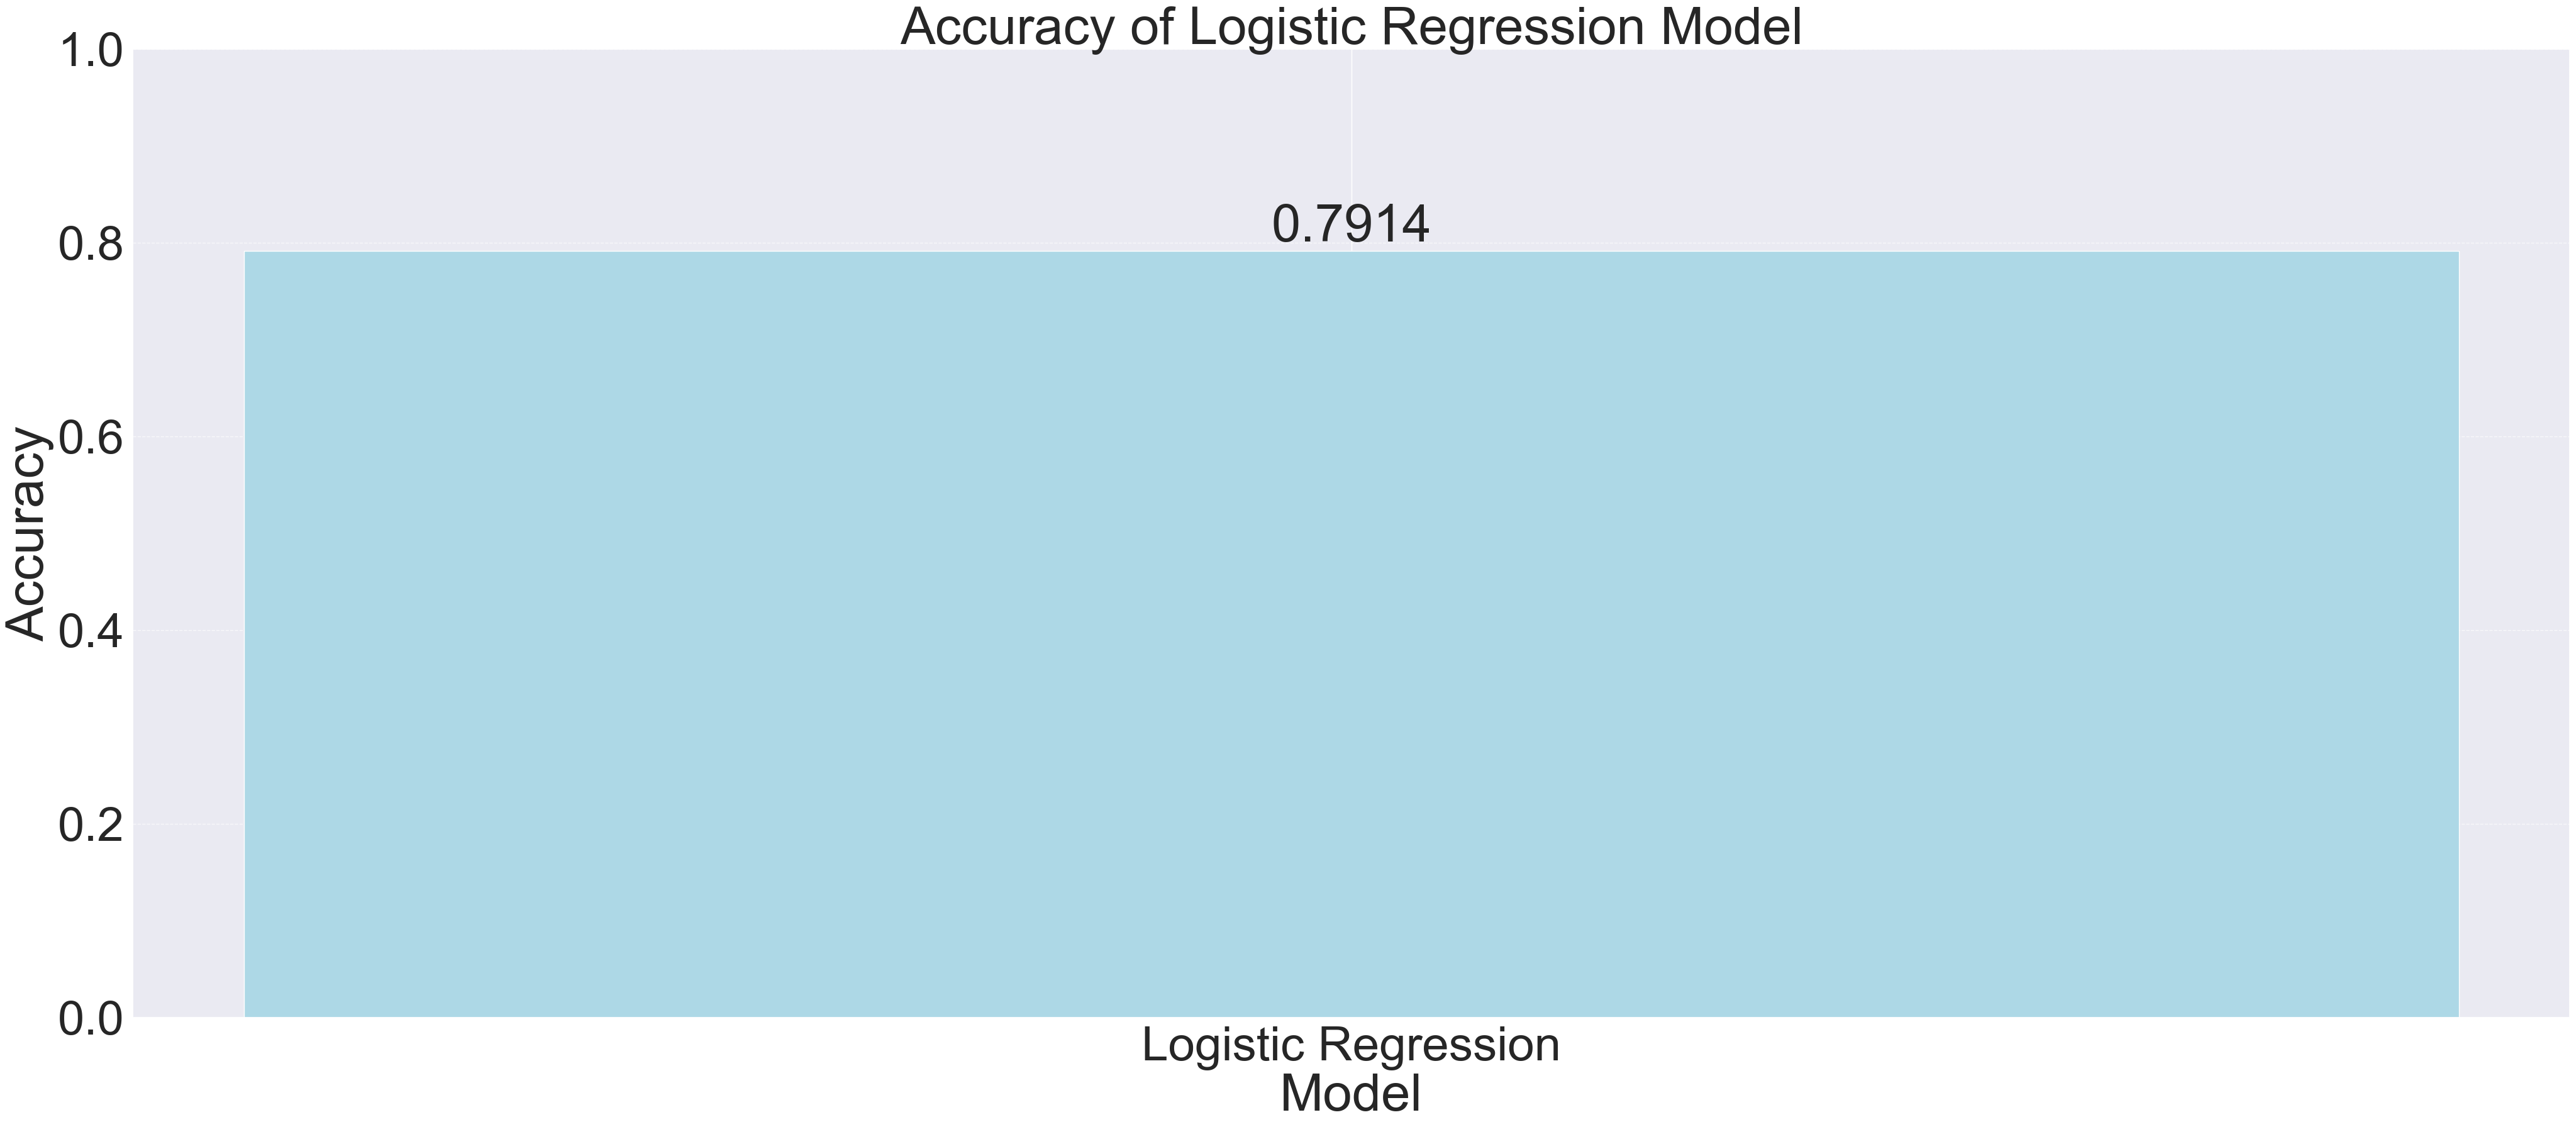

In [60]:
import matplotlib.pyplot as plt

# Accuracy value for Logistic Regression model
accuracy_logistic_regression = metrics.accuracy_score(lr_prediction,y_test)

# Plot accuracy graph
plt.figure(figsize=(50, 20))
plt.bar('Logistic Regression', accuracy_logistic_regression, color='lightblue')
plt.title('Accuracy of Logistic Regression Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add label to the bar
plt.text(0, accuracy_logistic_regression + 0.01, f'{accuracy_logistic_regression:.4f}', ha='center')

plt.show()



In [30]:
print('y_predicted= ',lr_prediction)
print('y_test= ',y_test)

y_predicted=  [1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]
y_test=  [0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0]


# CONCLUSION

1. The loan status is heavily dependent on the credit history for predictions.

2. the logistic regression algorithm gives us the maximum accuracy (79%) compared to the other machine learning classification algorithms.

# Model Development

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier(random_state=1)

In [33]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
predictions = model.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57        57
           1       0.77      0.80      0.78       106

    accuracy                           0.71       163
   macro avg       0.68      0.67      0.68       163
weighted avg       0.71      0.71      0.71       163



In [54]:
print('Decision Tree Accuracy: ',accuracy_score(y_test, predictions))

Decision Tree Accuracy:  0.7116564417177914


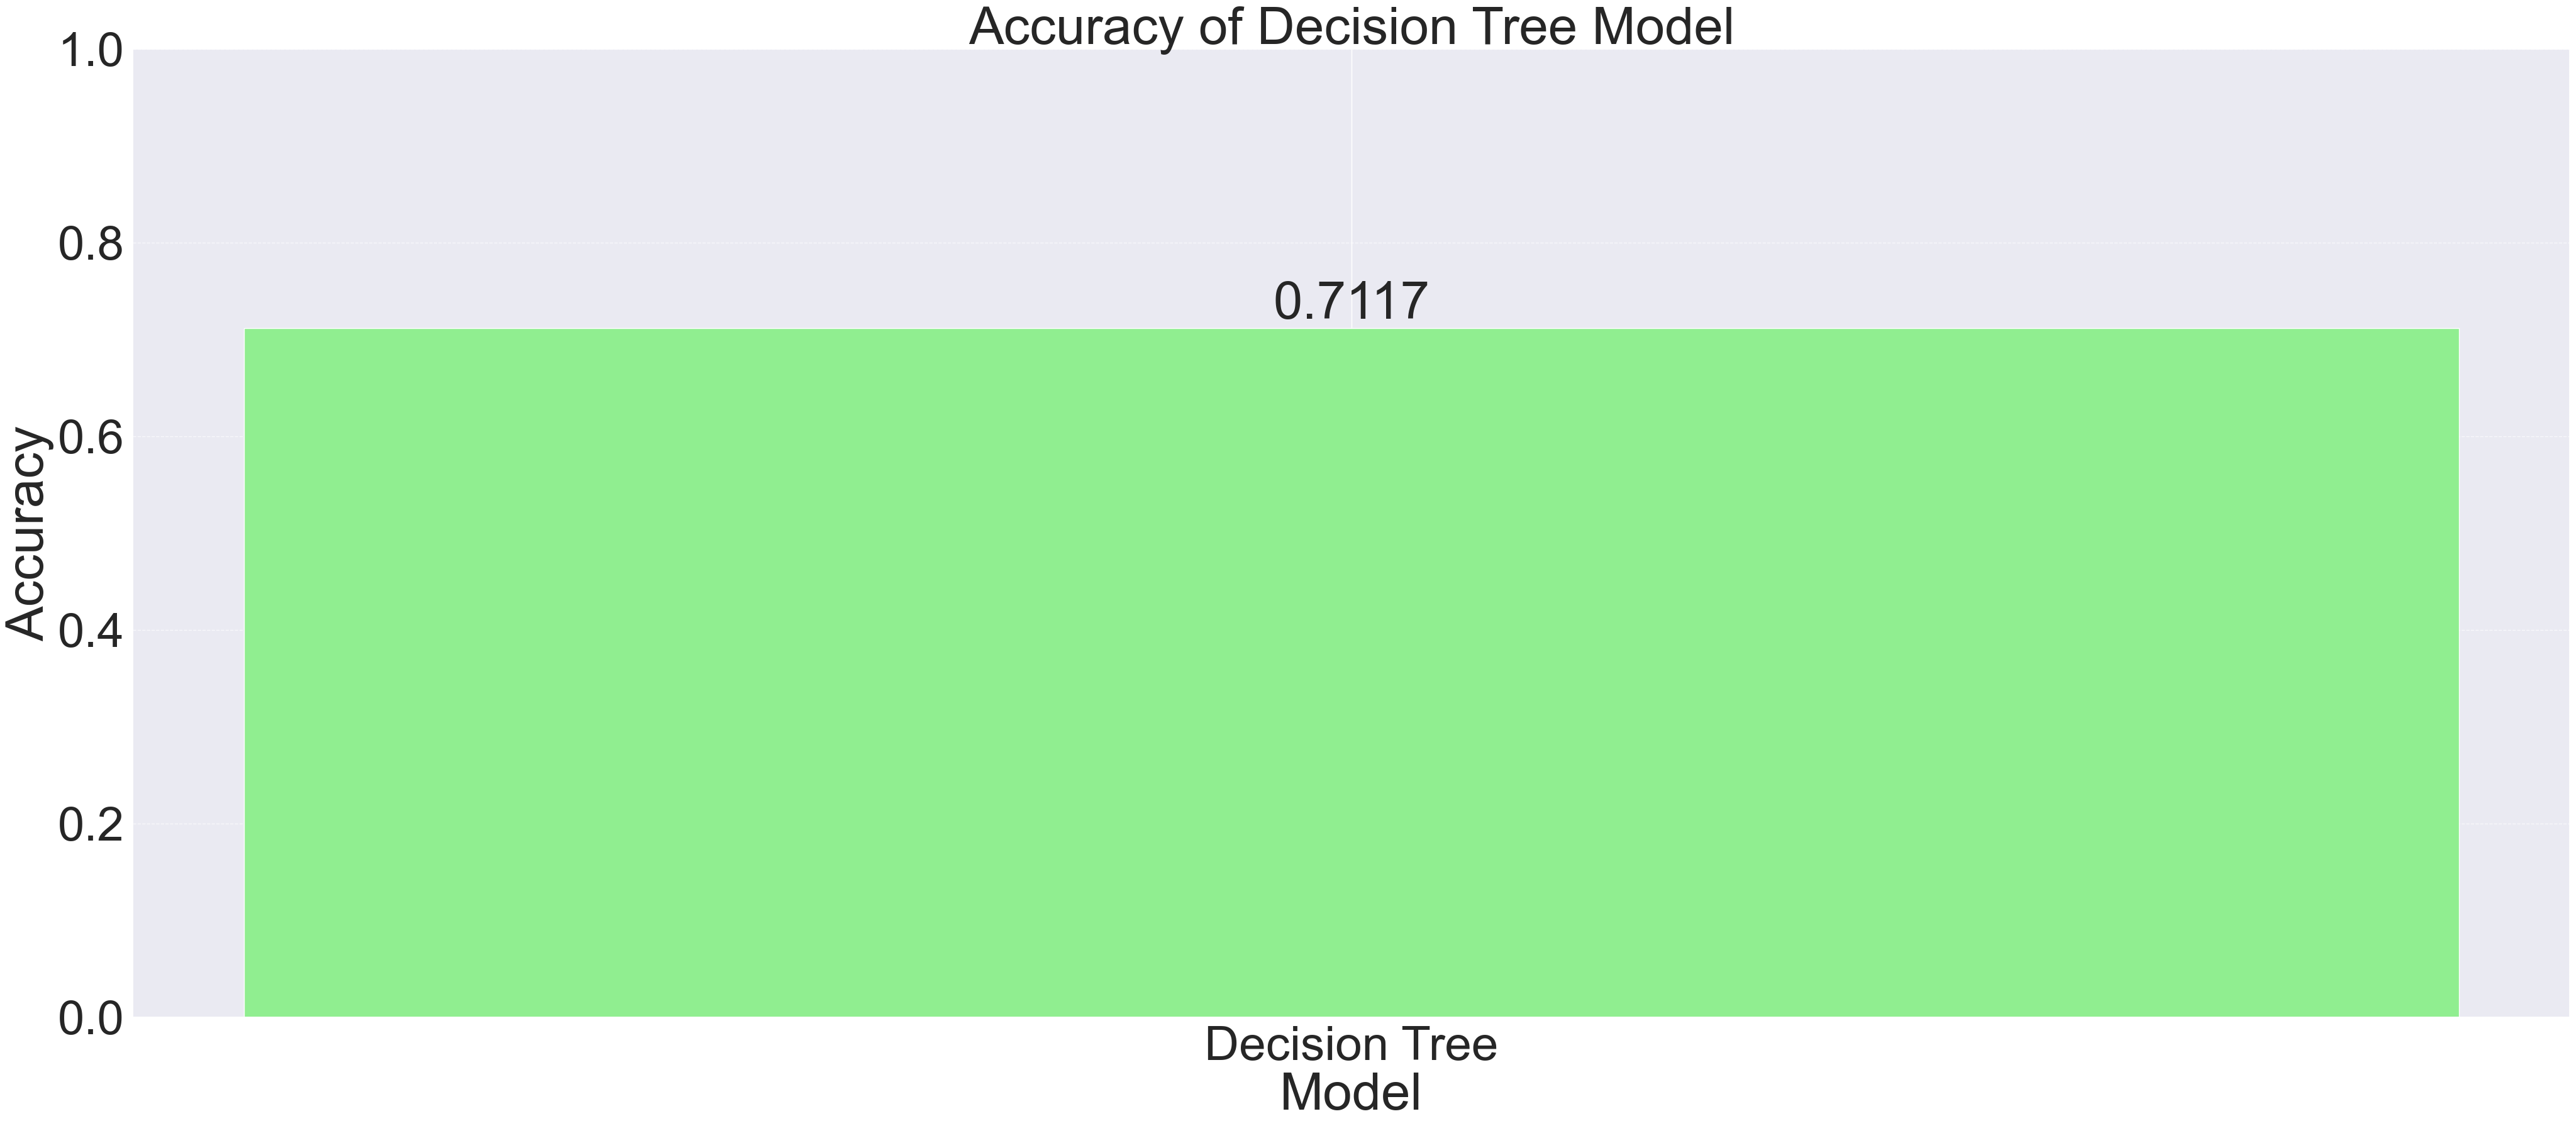

In [55]:
import matplotlib.pyplot as plt

# Accuracy value for Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, predictions)

# Plot accuracy graph
plt.figure(figsize=(50, 20))
plt.bar('Decision Tree', accuracy_decision_tree, color='lightgreen')
plt.title('Accuracy of Decision Tree Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add label to the bar
plt.text(0, accuracy_decision_tree + 0.01, f'{accuracy_decision_tree:.4f}', ha='center')

plt.show()


# Random Forest

Random Forest is a machine learning algorithm used for classification and regression tasks. It is an ensemble learning technique that combines multiple decision trees to improve accuracy and prevent overfitting. The algorithm is based on the concept of bagging, where multiple subsets of the data are created and used to train individual decision trees. The final prediction is made by aggregating the predictions of all decision trees, either by voting for classification tasks or by averaging for regression tasks.

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=500)
rfmodel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500)

In [39]:
rfpredictions_test = rfmodel.predict(x_test)

In [56]:
from sklearn import metrics
print("Accuracy on the test set using Random Forest: ", metrics.accuracy_score(y_test, rfpredictions_test))

Accuracy on the test set using Random Forest:  0.7914110429447853


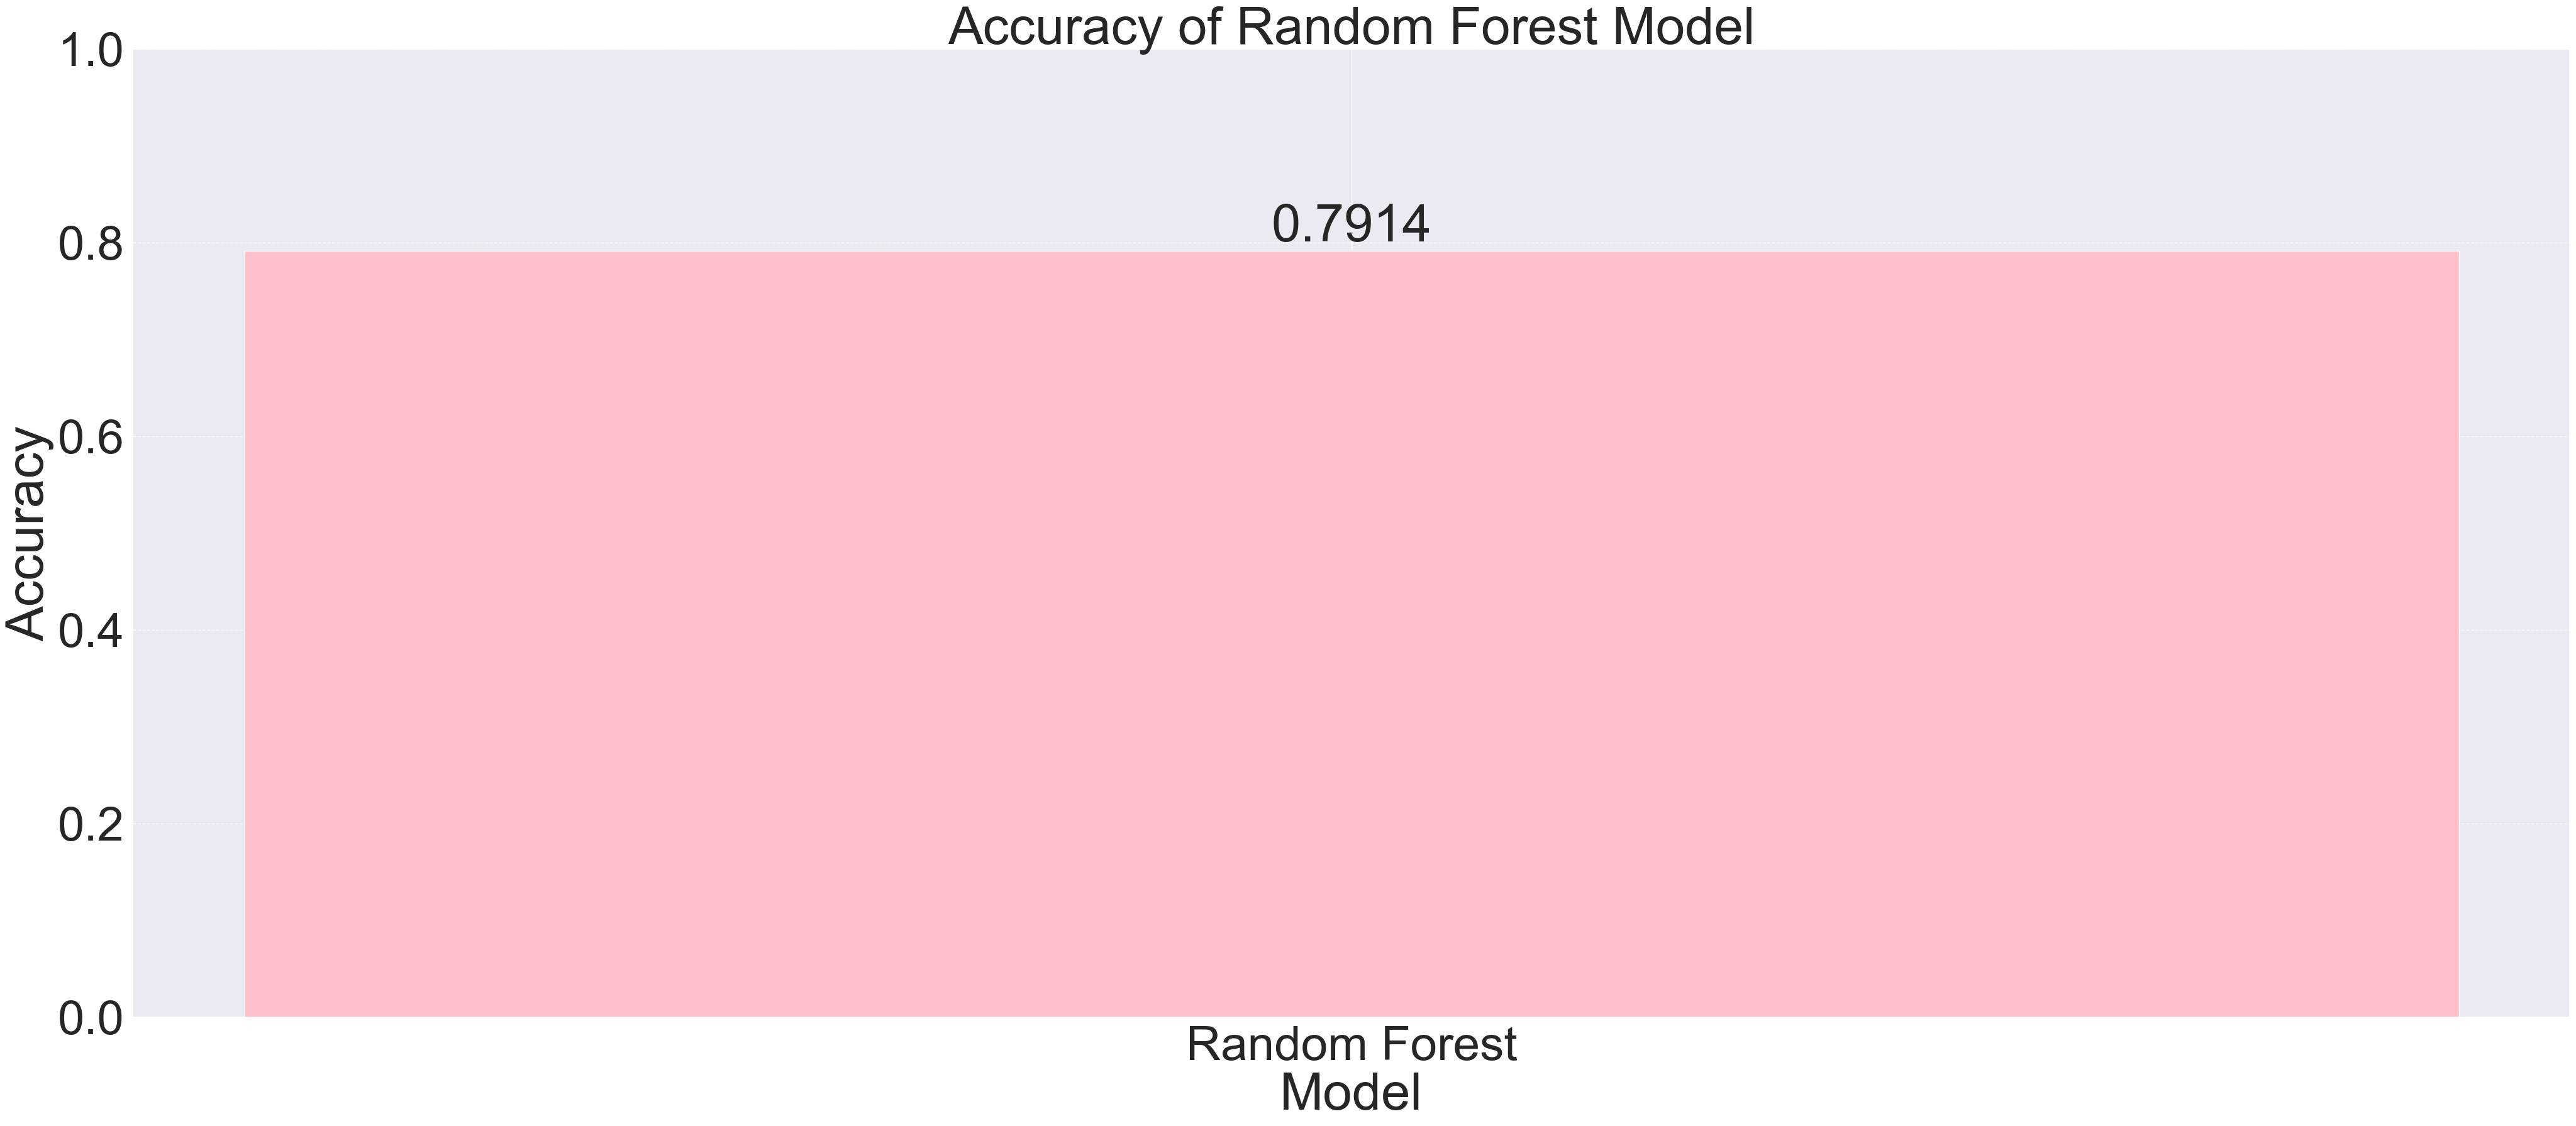

In [58]:
import matplotlib.pyplot as plt

# Accuracy value for Random Forest model
accuracy_random_forest = metrics.accuracy_score(y_test, rfpredictions_test)

# Plot accuracy graph
plt.figure(figsize=(50, 20))
plt.bar('Random Forest', accuracy_random_forest, color='pink')
plt.title('Accuracy of Random Forest Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add label to the bar
plt.text(0, accuracy_random_forest + 0.01, f'{accuracy_random_forest:.4f}', ha='center')

plt.show()


In [41]:
print(classification_report(y_test, rfpredictions_test))

              precision    recall  f1-score   support

           0       0.90      0.46      0.60        57
           1       0.77      0.97      0.86       106

    accuracy                           0.79       163
   macro avg       0.83      0.71      0.73       163
weighted avg       0.81      0.79      0.77       163



In [42]:
print(rfpredictions_test)
print(y_train)

[1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0]
[1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1

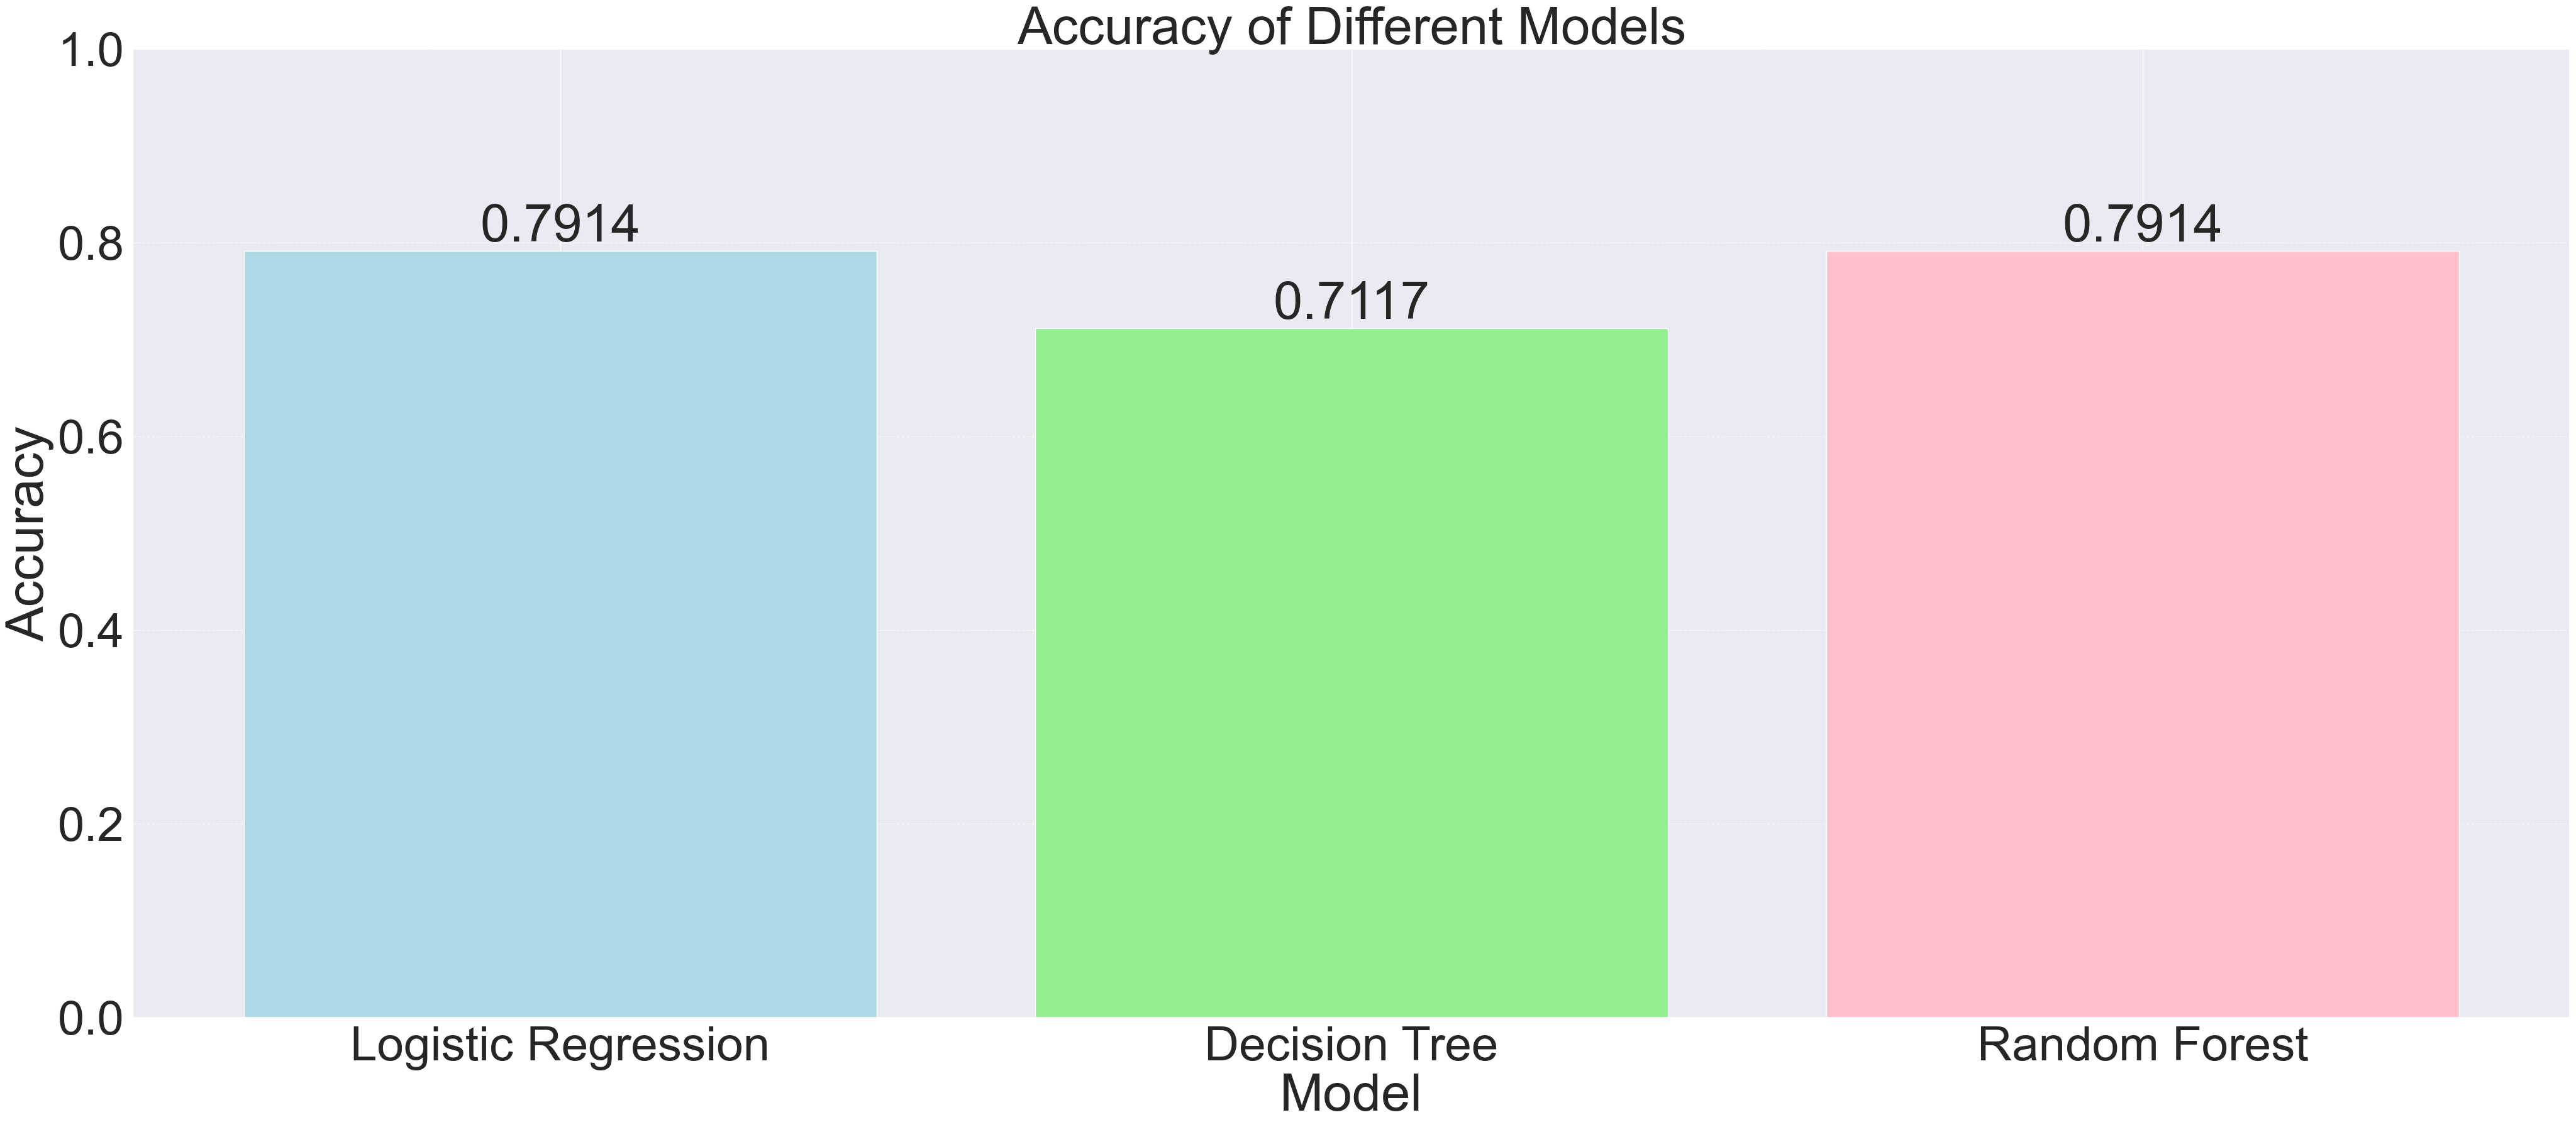

In [61]:
import matplotlib.pyplot as plt

# Accuracy values for different models
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [metrics.accuracy_score(lr_prediction,y_test), accuracy_score(y_test, predictions), metrics.accuracy_score(y_test, rfpredictions_test)]

# Plot accuracy graph
plt.figure(figsize=(50, 20))
plt.bar(models, accuracies, color=['lightblue', 'lightgreen', 'pink'])
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center')

plt.show()


# GUI

In [44]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
from sklearn.linear_model import LogisticRegression

# Function to train the machine learning model
def train_model():
    # Generate dummy data for demonstration
    X_train = np.random.rand(100, 3)  # Example features (applicant income, loan amount, credit history)
    y_train = np.random.randint(0, 2, 100)  # Example labels (0 for rejected, 1 for approved)
    
    # Train a logistic regression model (replace with your actual training code)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    return model

# Function to predict loan approval
def predict_loan():
    try:
        # Get input values from the user
        applicant_income = float(entry_income.get())
        loan_amount = float(entry_loan_amount.get())
        credit_history = int(entry_credit_history.get())
        
        # Make prediction using the model
        prediction = model.predict([[applicant_income, loan_amount, credit_history]])
        
        # Display prediction result
        if prediction[0] == 1:
            result_label.config(text="Loan Approved", fg="green")
        else:
            result_label.config(text="Loan Rejected", fg="red")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Train the machine learning model
model = train_model()

# Create GUI window
root = tk.Tk()
root.title("Loan Predictor")

# Create input fields
label_income = tk.Label(root, text="Applicant Income:")
label_income.grid(row=0, column=0, padx=10, pady=5)
entry_income = tk.Entry(root)
entry_income.grid(row=0, column=1, padx=10, pady=5)

label_loan_amount = tk.Label(root, text="Loan Amount:")
label_loan_amount.grid(row=1, column=0, padx=10, pady=5)
entry_loan_amount = tk.Entry(root)
entry_loan_amount.grid(row=1, column=1, padx=10, pady=5)

label_credit_history = tk.Label(root, text="Credit History (1 for Yes, 0 for No):")
label_credit_history.grid(row=2, column=0, padx=10, pady=5)
entry_credit_history = tk.Entry(root)
entry_credit_history.grid(row=2, column=1, padx=10, pady=5)

# Button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=predict_loan)
predict_button.grid(row=3, column=0, columnspan=2, pady=10)

# Display prediction result
result_label = tk.Label(root, text="", font=("Helvetica", 16))
result_label.grid(row=4, column=0, columnspan=2, pady=5)

root.mainloop()
